In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
df=pd.read_csv('/content/drive/MyDrive/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
print(len(df.columns))

7


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
type(df)

pandas.core.frame.DataFrame

<Axes: xlabel='region', ylabel='charges'>

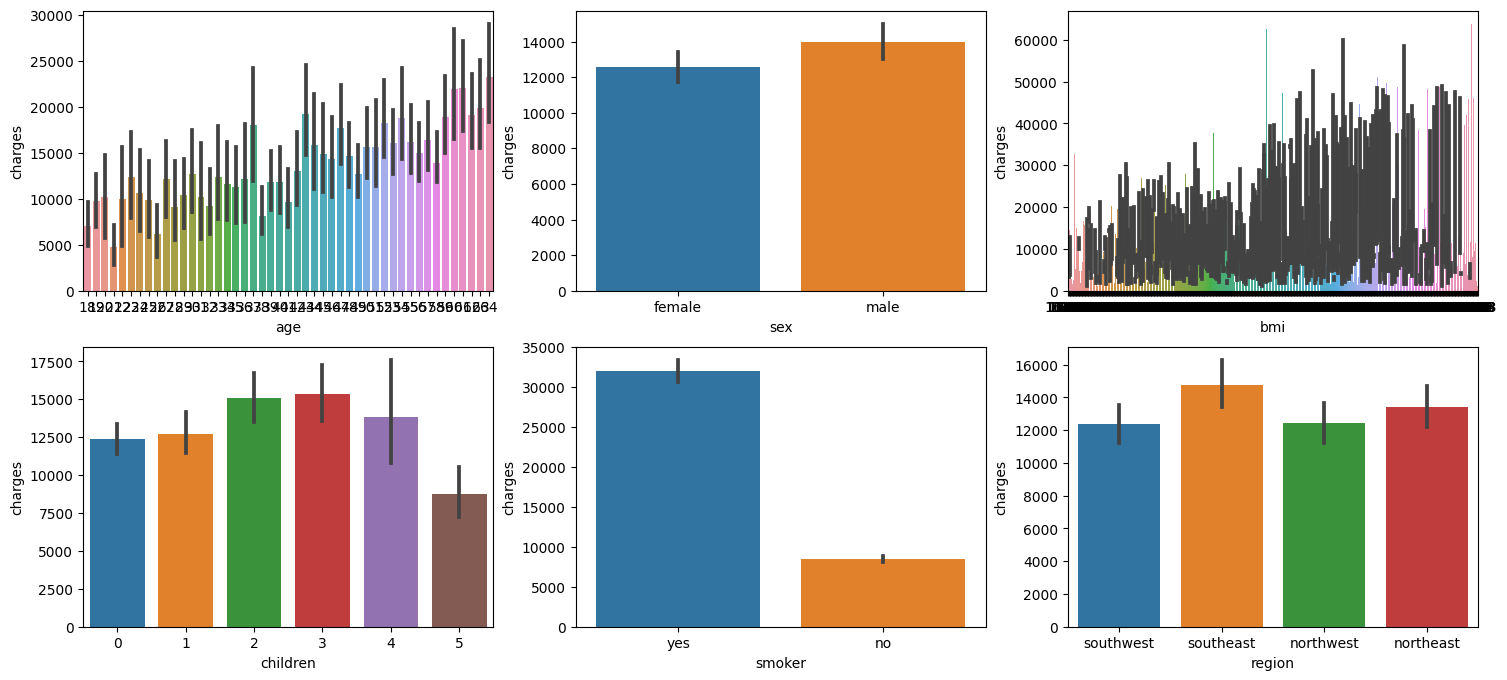

In [25]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)

sns.barplot(data=df,x='age',y='charges',ax=ax1)
sns.barplot(data=df,x='sex',y='charges',ax=ax2)
sns.barplot(data=df,x='bmi',y='charges',ax=ax3)
sns.barplot(data=df,x='children',y='charges',ax=ax4)
sns.barplot(data=df,x='smoker',y='charges',ax=ax5)
sns.barplot(data=df,x='region',y='charges',ax=ax6)

<Axes: xlabel='region', ylabel='charges'>

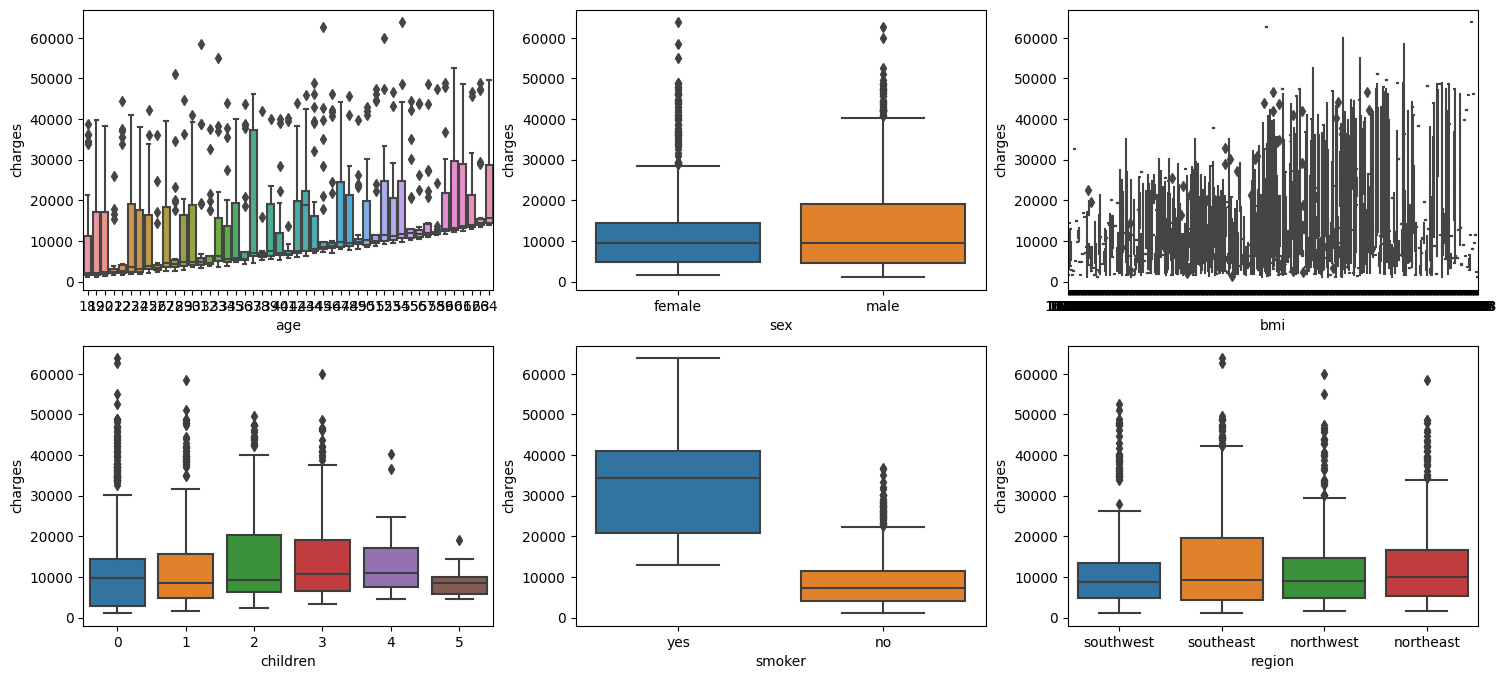

In [24]:
fig,axes=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)

sns.boxplot(data=df,y='charges',x='age', orient='v', ax=axes[0][0])
sns.boxplot(data=df,y='charges',x='sex', orient='v', ax=axes[0][1])
sns.boxplot(data=df,y='charges',x='bmi', orient='v', ax=axes[0][2])
sns.boxplot(data=df,y='charges',x='children', orient='v', ax=axes[1][0])
sns.boxplot(data=df,y='charges',x='smoker', orient='v', ax=axes[1][1])
sns.boxplot(data=df,y='charges',x='region', orient='v', ax=axes[1][2])

<Axes: xlabel='smoker_yes', ylabel='charges'>

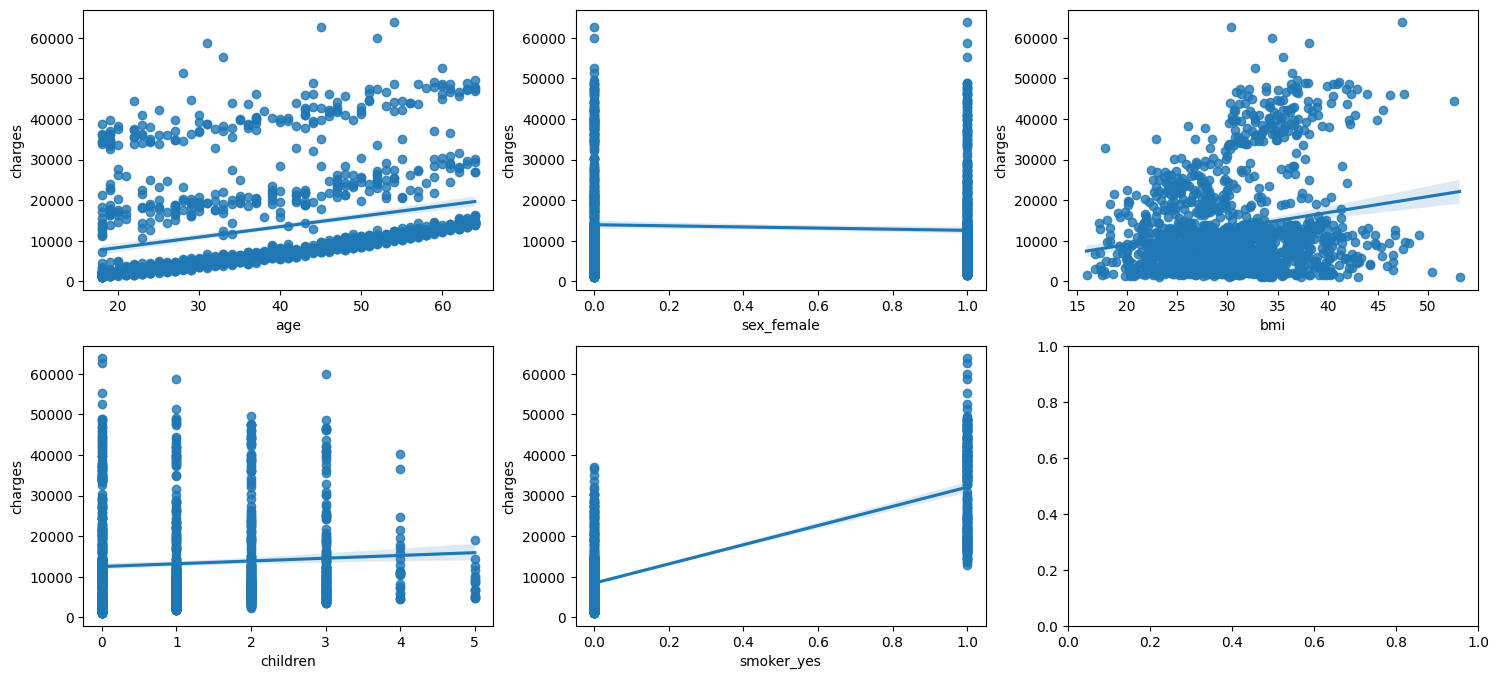

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)
sns.regplot(x='age',y='charges',data=df,ax=axes[0][0])
sns.regplot(x='sex_female',y='charges',data=df_lr, ax=axes[0][1])
sns.regplot(x='bmi',y='charges',data=df, ax=axes[0][2])
sns.regplot(x='children',y='charges',data=df, ax=axes[1][0])
sns.regplot(x='smoker_yes',y='charges', data=df_lr, ax=axes[1][1])

<Axes: xlabel='sex', ylabel='charges'>

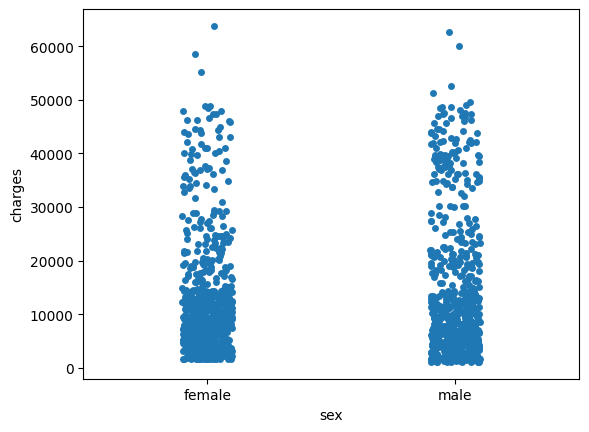

In [ ]:
sns.stripplot(x='sex', y='charges',
              jitter=True,
              data=df)

<Axes: xlabel='smoker', ylabel='charges'>

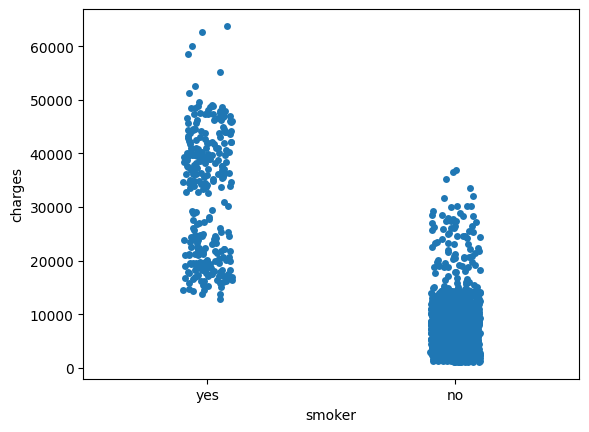

In [ ]:
sns.stripplot(x='smoker', y='charges',
              jitter=True,
              data=df)

<Axes: xlabel='age', ylabel='charges'>

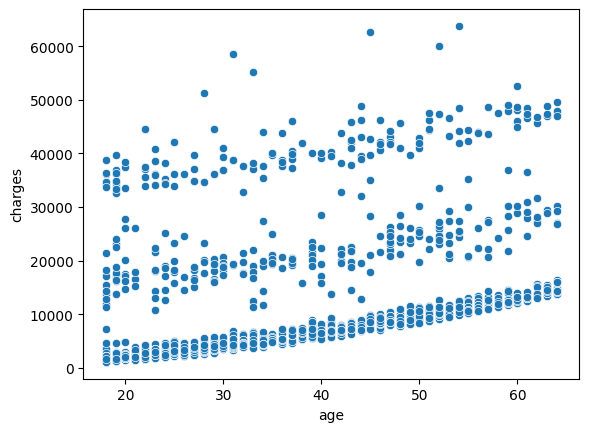

In [ ]:
sns.scatterplot(x='age', y='charges', data=df)

In [116]:
count_q1=np.percentile(df['charges'],25)
count_q1
count_q3=np.percentile(df['charges'],75)
count_q3
count_IQR=count_q3-count_q1
count_IQR
df_IQR=df[(df['charges']>=(count_q1-(1.5*count_IQR)))& 
                        (df['charges']<=(count_q3+(1.5*count_IQR)))]
print(df_IQR)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1199 rows x 7 columns]


<Axes: xlabel='age', ylabel='charges'>

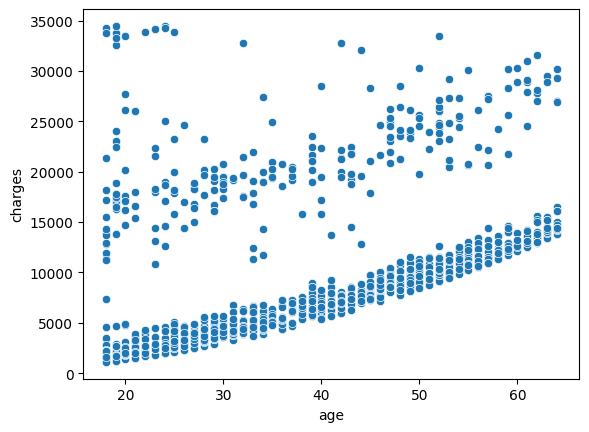

In [123]:
sns.scatterplot(x='age', y='charges', data=df_IQR)

<Axes: xlabel='bmi', ylabel='charges'>

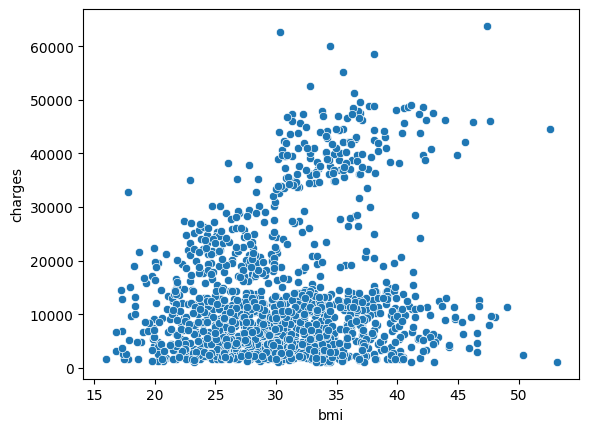

In [126]:
sns.scatterplot(x='bmi', y='charges', data=df)

In [1]:
df_lr = pd.get_dummies(df_IQR, columns = ['sex','smoker','region'])

NameError: name 'pd' is not defined

In [121]:
df_lr

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [129]:
df_lr.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_lr.corr(), annot=True, cmap='Pastel1',square=True)

In [130]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# x=df_lr[['age', 'sex_female', 'sex_male', 'bmi', 'children', 'smoker_no', 'smoker_yes']]
# y=df_lr[['charges']]
# df_lr.drop('region',axis=1,inplace=True)
# X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,
#                                                test_size=0.2)
# df_lr=LinearRegression()
# df_lr.fit(X_train,y_train)
# y_preds=df_lr.predict(X_test)
# mse=mean_squared_error(y_test,y_preds)
# rmse=np.sqrt(mse)

# print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse,rmse))
# print('Variance score:{0:.3f}'.format(r2_score(y_test,y_preds)))
# print('절편 값:', df_lr.intercept_)
# print('회귀계수값:', np.round(df_lr.coef_,1))

In [133]:
df_lr= df_lr[['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]
corrMatt = df_lr.corr()
print(corrMatt)
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                       age       bmi  children   charges  sex_female  \
age               1.000000  0.119505  0.040215  0.437642    0.021252   
bmi               0.119505  1.000000  0.002736 -0.066495   -0.027368   
children          0.040215  0.002736  1.000000  0.083713   -0.013131   
charges           0.437642 -0.066495  0.083713  1.000000    0.024358   
sex_female        0.021252 -0.027368 -0.013131  0.024358    1.000000   
sex_male         -0.021252  0.027368  0.013131 -0.024358   -1.000000   
smoker_no         0.067391  0.255583  0.005651 -0.602220    0.012749   
smoker_yes       -0.067391 -0.255583 -0.005651  0.602220   -0.012749   
region_northeast  0.003296 -0.132410 -0.020611  0.063953   -0.000332   
region_northwest -0.001355 -0.119048  0.013107  0.035171   -0.002604   
region_southeast -0.017384  0.245156 -0.018673 -0.028649   -0.002678   
region_southwest  0.015759  0.004532  0.026425 -0.070884    0.005706   

                  sex_male  smoker_no  smoker_yes  region_north

<Axes: >

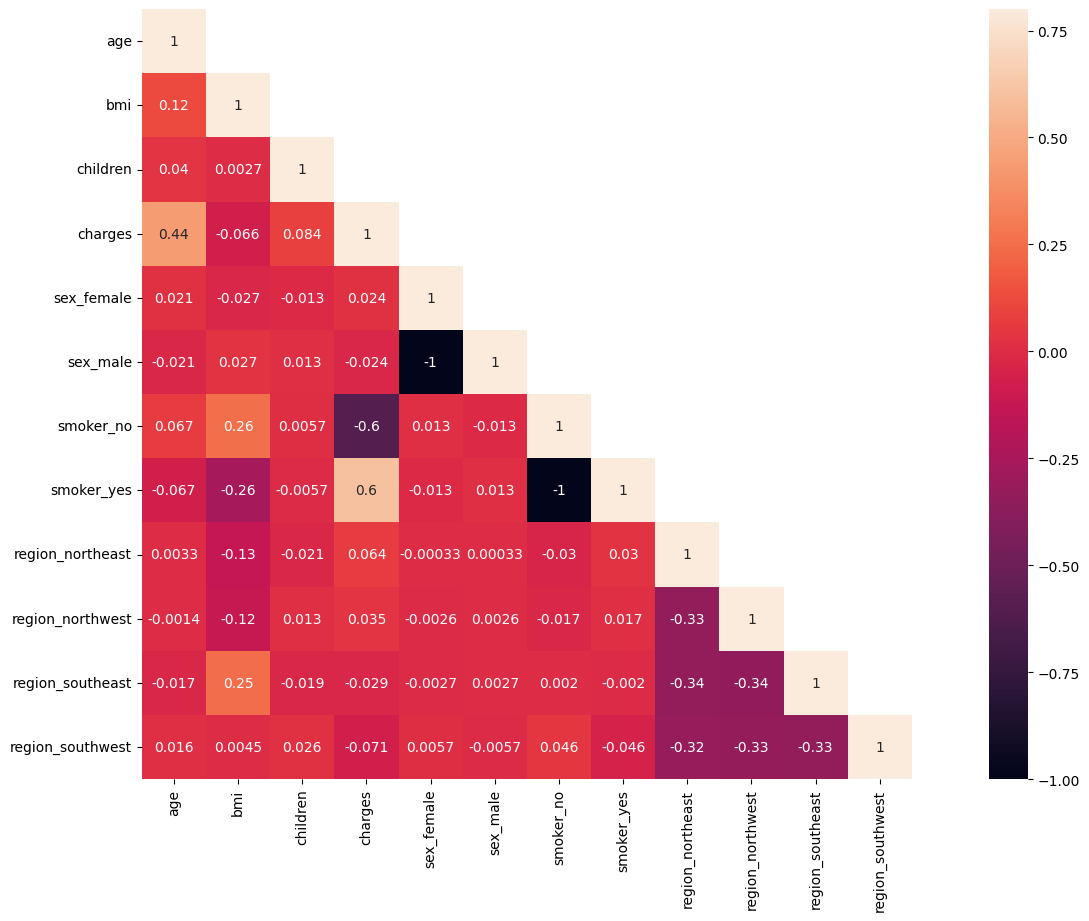

In [134]:
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

<Axes: xlabel='sex_female', ylabel='charges'>

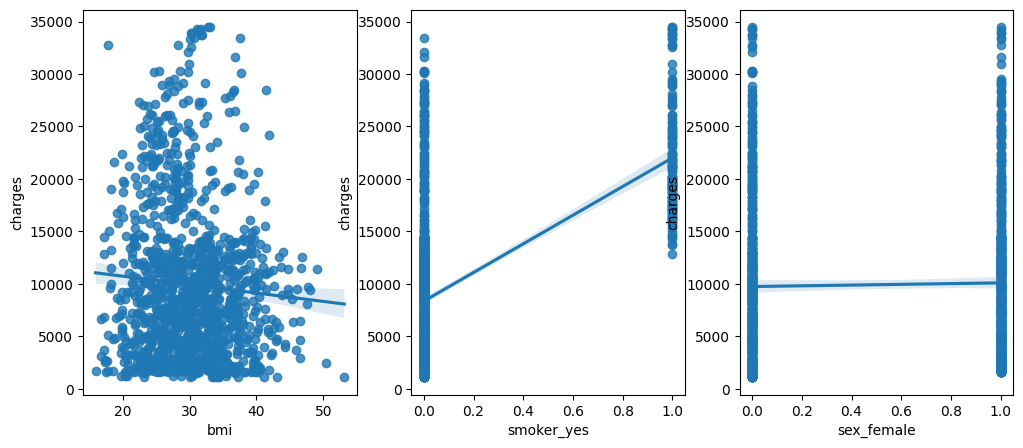

In [135]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x='bmi',y='charges',data=df_lr,ax=ax1)
sns.regplot(x='smoker_yes',y='charges',data=df_lr, ax=ax2)
sns.regplot(x='sex_female',y='charges', data=df_lr,ax=ax3)